# Homework solutions for hacker / resampling-based statistics

## Introduction 

Now you have a good understanding about 1) what is hacker statistics / resampling based statistical inferences, 2) how to estimate the confidence intervals for given parameters using Bootstrap, and 3) how to compare statistics of two populations with permutation test. It's time to apply these knowledge to the real world problems!  

<br>

Here you will be working with per capita nitrous oxide emission data from the United States from 1990 to 2016. As we may know, green house gas emission, such as carbon dioxide (CO2), is a big environmental issue. Less well known as CO2, nitrous oxide (N2O), contributing to around $6\%$ of the overall green house gas emission, has becoming a recent environmental concern. In this assignment, you will focus on studying the per capita N2O emission of the United States before and after year 2015. 

## Tasks:

- Go through and run the cells in **Step 1** to pre-process the N2O data you are gonna use in the later sections

- Finish **Question 1** and **Question 2** following the instructions

- Use the lecture notebook as your reference if needed

## Note:

All the functions you created in the lecture exercises that generate Bootstrap or Permutation samples, replicates, or test statistic (`bs_replicate_1d`; `draw_bs_reps`; `permutation_sample`, `draw_permutation_reps`, `mean_diff`) are collected into the `hast` module. This module will be loaded for you in **Step 1**. Later you can call these functions in `hast` just like how you would call functions from any other modules, such as `numpy`, for instance, use `hast.draw_bs_reps(...)` to draw Bootstrap replicates. You can also get the documentation information of each function just like how you would do with any other functions, for example, get the usage information of `hast.mean_diff` function by `help(hast.mean_diff)`. 

## Step 1. Read in and pre-processing the data

### 1. **Install packages**  

First, let's install the packages that will be used to analyze the per capita nitrous oxide emissions data. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hast

### 2. **Read in the nitrous oxide emissions data**

In [43]:
df = pd.read_csv('../data/N2O.csv', sep = ',')

In [44]:
df.tail()

,Entity,Code,Year,Total including LUCF (per capita)
5152,Zimbabwe,ZWE,2012,0.527640
5153,Zimbabwe,ZWE,2013,0.499625
5154,Zimbabwe,ZWE,2014,0.461471
5155,Zimbabwe,ZWE,2015,0.483532
5156,Zimbabwe,ZWE,2016,0.466857


In [45]:
df.shape

(5157, 4)

### 3. **Extract the data of interest**

The original `df` contains records of N2O emissions from different countries throughout years. In this assignment, we will be interested in only the N2O emission from **the United States** throughout all the years:

In [46]:
usa_N2O = df.loc[(df.Entity == 'United States')].loc[:, 'Total including LUCF (per capita)']
usa_N2O = usa_N2O.to_numpy()
year = df.loc[(df.Entity == 'United States')].loc[:, 'Year']
year = year.to_numpy()
np.mean(usa_N2O)

0.9140704142448755

### 4. **Visualize the emission data from the United States throughout the years**

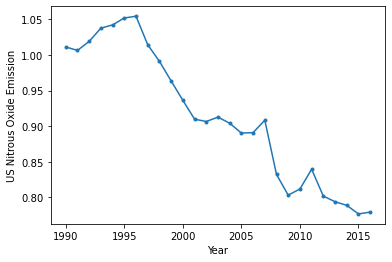

In [47]:
# Make a plot to visualize the data
_ = plt.plot(year, usa_N2O, marker = '.')
#_ = plt.plot(year, world_N2O, marker = '.')
_ = plt.xlabel('Year')
_ = plt.ylabel('US Nitrous Oxide Emission')
#_ = plt.legend(["USA"], loc ="best")
plt.show()

### 5. What questions do we want to ask?

Often, you may already have some questions to ask before getting your data, or you may have some new questions after doing some exploratory data analysis. It's a good practice to clearly state your questions before starting the next step analysis. In the figure above, we can see that the nitrous oxide emission roughly follow a decreasing trend throughout the years. Today, our question will be:

- Are the nitrous oxide emissions of United States after year 2005 different from those before 2005?

**Based on the question, let's create `usa_pre` and `usa_post` arrays that contains the yearly N2O emissions from the United States before and after year 2005. You will be working with these two sample arrays in the rest of this assignment**

In [48]:
usa_pre = df.loc[(df.Entity == 'United States') & (df.Year <2005)].loc[:, 'Total including LUCF (per capita)']
usa_pre = usa_pre.to_numpy()
usa_post = df.loc[(df.Entity == 'United States') & (df.Year >= 2005)].loc[:, 'Total including LUCF (per capita)']
usa_post = usa_post.to_numpy()

## Step 2. Bootstrap Confidence interval 

<br>

**Question 1.** In this problem, you will explore the average N2O emissions of United States before and after year 2015 separately. You will work with 2 sample arrays: 1) `usa_pre`: yearly N2O emission data from the United States before year 2005, and 2) `usa_post`: yearly N2O emission data from the United States after year 2005. You will construct a $95\%$ Bootstrap confidence interval for each of the two sample arrays using the `draw_bs_reps()` function you generated in the lecture exercise (Hint: You can call the function by `hast.draw_bs_reps(...)`). Follow the detailed instructions below: 

**Instructions:**

**(1).** print the means of `usa_pre` and `usa_post` in the cells below: 

In [49]:
print(np.mean(usa_pre))

0.9842105103812935


In [50]:
print(np.mean(usa_post))

0.826395294074353


**(2).** Use the `draw_bs_reps` function you created in the lecture exercises to generate 10000 means as Bootstrap replicates from `usa_pre` sample, and assign the results to `bs_usa_pre` variable

In [51]:
help(hast.draw_bs_reps)

Help on function draw_bs_reps in module hast:

draw_bs_reps(data, func, size=1)
    Generate Bootstrap replicates with a given 1-d sample, a function to calculate statistic of interest, and the number of replicates to generate
    
    Parameters
    ----------
    data : int/double array
        A given 1-d sample
    func : function name
        The function to calculate the test statistic of interest
    size : int
        The number of replicates to generate
    
    Returns
    -------
    bs_replicates
        An array of generated Bootstrap replicates



In [52]:
bs_usa_pre = hast.draw_bs_reps(usa_pre, np.mean, size = 10000)

In [53]:
# Generate a 95% confidence interval for `bs_usa_pre`
np.percentile(bs_usa_pre, [2.5, 97.5])

array([0.95629817, 1.01099127])

**(3).** Use the `draw_bs_reps` function you created in the lecture exercises to generate 10000 means as Bootstrap replicates from `usa_post` sample, and assign the results to `bs_usa_post` variable

In [54]:
bs_usa_post = hast.draw_bs_reps(usa_post, np.mean, size = 10000)

In [55]:
# Generate a 95% confidence interval for `bs_usa_post`
np.percentile(bs_usa_post, [2.5, 97.5])

array([0.80219572, 0.85170282])

**(4).** Interpretation of the two confidence intervals (Check the lecture notebook)

Answer: For the N2O emission of the United States before year 2005: If we resampled the data over and over again (10000 times), $95\%$ of the observed values would lie within the $95\%$ confidence interval, which is $[0.95616389, 1.0113352]$ (as calculated above).

Answer: For the N2O emission of the United States after year 2005: If we resampled the data over and over again (10000 times), $95\%$ of the observed values would lie within the $95\%$ confidence interval, which is $[0.80277227, 0.85254938]$. 

## Step 3. Permutation test

<br>

**Question 2.** In this problem, you will test the null hypothesis: N2O emissions in the United States before and after 2005 are the same, using permutation test. You will again use the `usa_pre` and `usa_post` sample arrays. 

$H0$: $\mu_1 = \mu_2$   
$Ha$: $\mu_1 > \mu_2 $

**Instructions**:

**(1).** We will use the difference between means of the two arrays before and after 2005 as test statistic. Compute the observed test statistic using `mean_diff()` function you created in the lecture exercises (Hint: `mean_diff` function can be called by `hast.mean_diff(...)`). 

In [56]:
observed_diff = hast.mean_diff(usa_post, usa_pre)

In [57]:
observed_diff

0.1578152163069405

**(2).** Compute 10000 test statistics (again the difference between means) simulated from 10000 permutation samples using `draw_permutation_reps()` function you created in the lecture exercises (Hint: you can call the `draw_permutation_reps` function by `hast.draw_permutation_reps(...)`)

In [58]:
perm_replicates = hast.draw_permutation_reps(usa_post, usa_pre, hast.mean_diff, size = 10000)

In [59]:
perm_replicates

array([ 0.01818293, -0.04059352,  0.01695302, ...,  0.0168029 ,
       -0.02402167,  0.00602889])

**(3).** Compute p-values: count the number of test-statistics as or more extreme than our initially observed test statistic, and divide that number by the total number of test-statistics we calculated.

In [60]:
p = np.sum(perm_replicates > observed_diff) / len(perm_replicates)
p

0.0

**(4).** Interpretation of the p-value

Answer: $p-value < 0.05$ rejects the null hypothesis and suggests that if the null hypothesis is true, there will be very very few simultated test statistics as or more extreme than the observed one. Thus, the N2O emissions of the United States is probably different before and after 2005. 